In [118]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [240]:
%load_ext autoreload
%autoreload 1
%aimport cooking_session
%run cooking_session.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
# Packages
import pandas as pd
import numpy as np

In [242]:
# Source file
df_raw = pd.read_csv('dataframe_raw.csv', sep=',')

In [243]:
import matplotlib                                      
import datetime as dt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  
import matplotlib.pyplot as plt                         
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU 
import matplotlib.dates as mdates                       
import matplotlib.ticker as ticker                      
import matplotlib.patches as mpatches                   
import pylab                                            
from pylab import rcParams                              
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=14) 
plt.rc('axes', axisbelow=True, labelsize=14)
plt.rc('legend', fontsize=10)

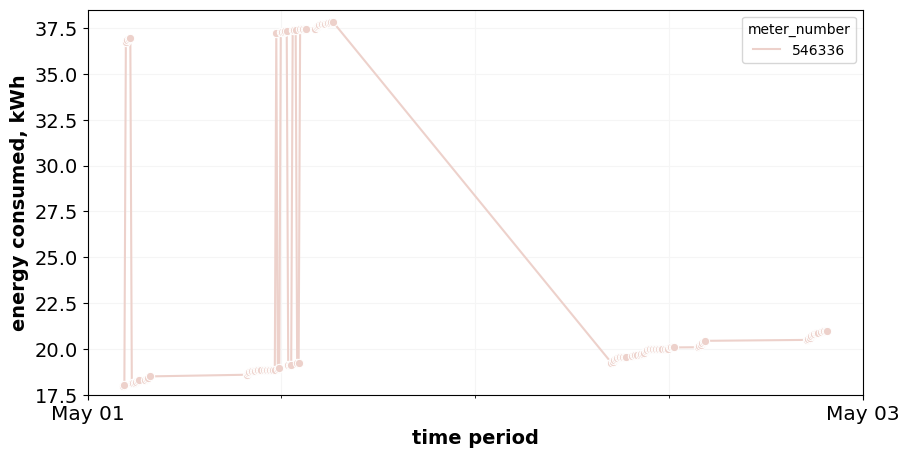

In [244]:
df_raw_period = df_raw.copy()
df_raw_period = cooking_session.period(df_raw_period, '2020-05-01', '2020-05-03')
df_raw_period_meter = df_raw_period.loc[df_raw_period['meter_number']==546336]
df_plot = df_raw_period_meter.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker="o", legend='full')
formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
plt.gca().set_ylim(17.5,38.5)
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')

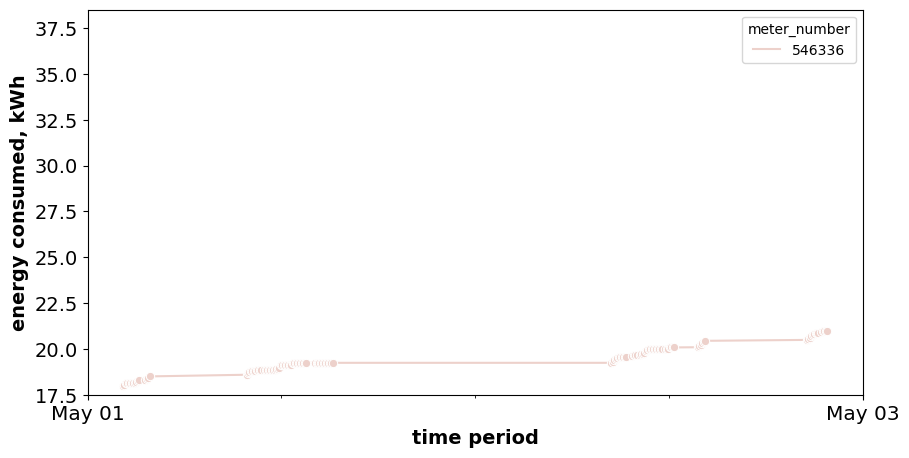

In [245]:
df_raw_period = df_raw.copy()
df_raw_period = cooking_session.remove_spikes(df_raw_period)
df_raw_period = cooking_session.period(df_raw_period, '2020-05-01', '2020-05-03')
df_raw_period_meter = df_raw_period.loc[df_raw_period['meter_number']==546336]

plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')

sns.lineplot(x='timestamp', y='energy', data=df_raw_period_meter, hue='meter_number', marker="o", legend='full')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
plt.gca().set_ylim(17.5,38.5)
plt.show()

## Spikes

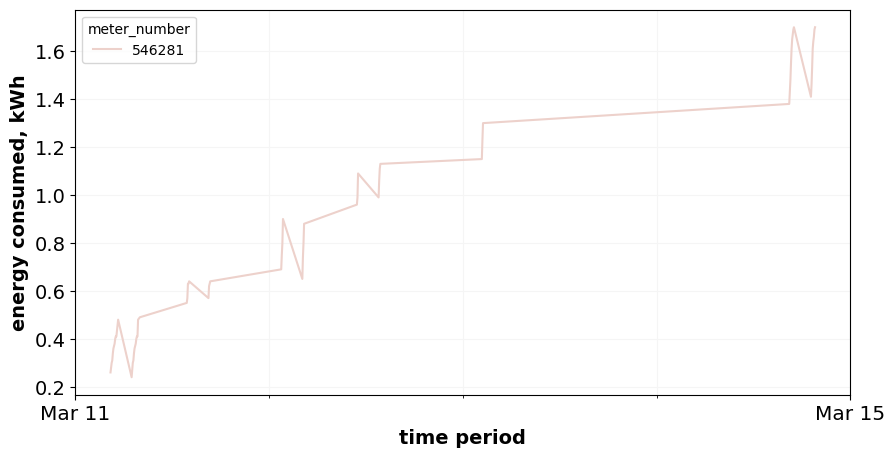

In [246]:
df_raw_period = df_raw.copy()
#df_raw_period = cooking_session.remove_spikes(df_raw_period)
df_raw_period = cooking_session.period(df_raw_period, '2020-03-11', '2020-03-16')
df_raw_period_meter = df_raw_period.loc[df_raw_period['meter_number']==546281]

plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')

sns.lineplot(x='timestamp', y='energy', data=df_raw_period_meter, hue='meter_number', marker=None, legend='full')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
plt.grid(True, which='both', color='whitesmoke')
plt.show()

In [247]:
df_processed = cooking_session.remove_spikes(df_raw)
df_processed = cooking_session.cooking_event(df_raw)
df_epc = cooking_session.timestamp_issue(df_processed)

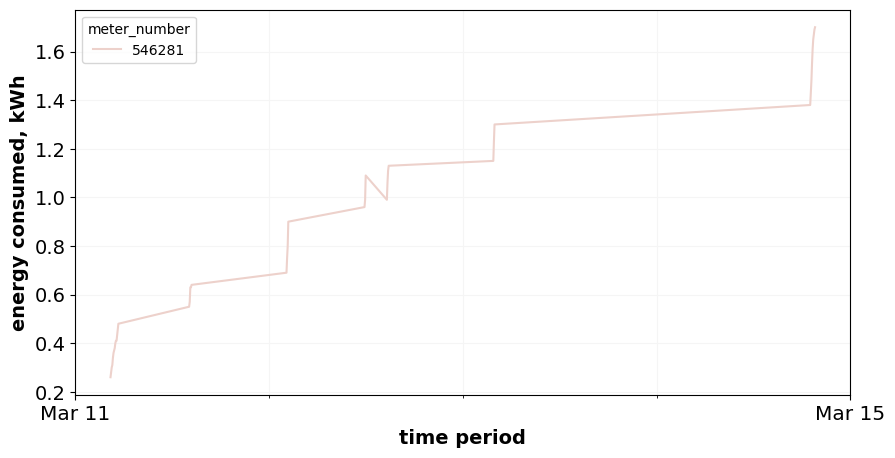

In [248]:
df_epc_period = df_epc.copy()
df_epc_period = cooking_session.period(df_epc_period, '2020-03-11', '2020-03-16')
df_epc_period_meter = df_epc_period.loc[df_epc_period['meter_number']==546281]
df_plot = df_epc_period_meter.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker=None, legend='full')
formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
#plt.gca().set_ylim(17.5,38.5)
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')

In [249]:
df_only_events = cooking_session.only_events(df_epc)
df_period = cooking_session.period(df_only_events)

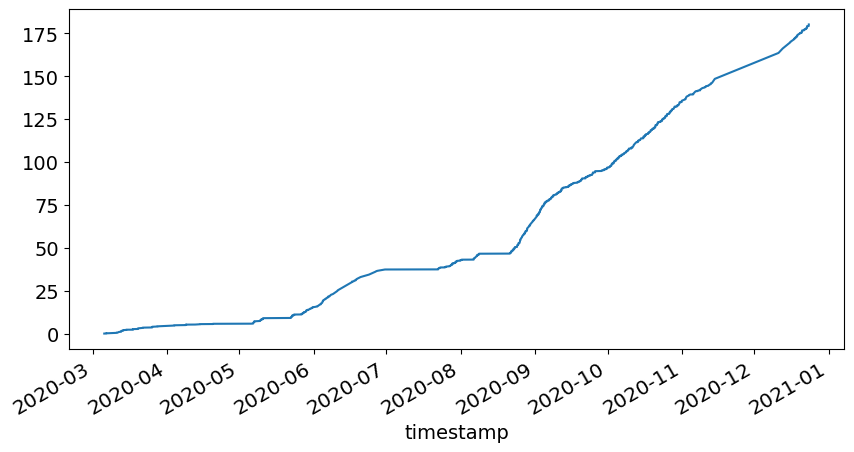

In [250]:
df_epc_meter = df_epc.loc[df_epc['meter_number']==546375]
df_epc_meter.energy.plot()
plt.show()